In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

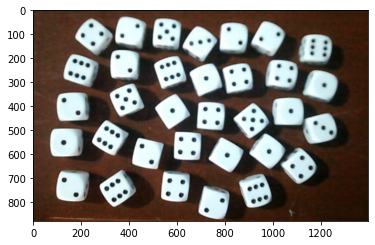

In [2]:
og_img = cv2.imread('images/twentythree.png')
plt.imshow(og_img, cmap='gray')

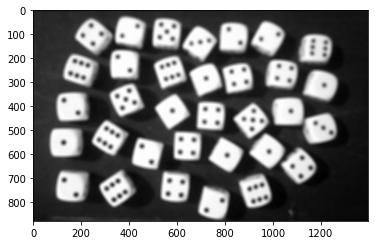

In [3]:
img = cv2.cvtColor(og_img, cv2.COLOR_BGR2GRAY)
img = cv2.blur(img, (15, 15))
plt.imshow(img, cmap='gray')

In [4]:
print(img.shape)

(878, 1396)


In [5]:
ret, thresh1 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

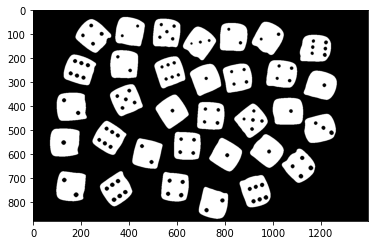

In [6]:
plt.imshow(thresh1, cmap='gray')

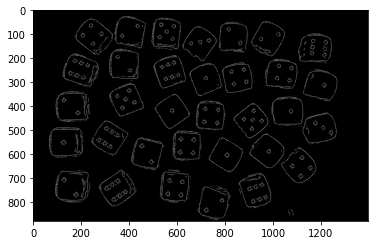

In [7]:
edges = cv2.Canny(img, 40, 40)
plt.imshow(edges, cmap = 'gray')

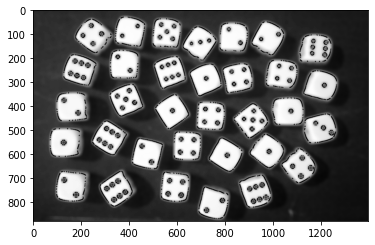

In [8]:
contours = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
canvas = np.zeros_like(img)
for contour in contours:
    cv2.drawContours(img, contour, -1, (0, 255, 0), 3)
plt.imshow(img, cmap='gray')

33


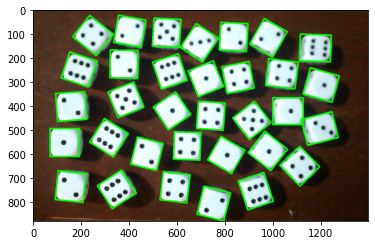

In [9]:
another = og_img.copy()
count = 0
contours = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
for contour in contours:
    rect = cv2.minAreaRect(contour)
    area = rect[1][0] * rect[1][1]
    if area < 5000 or area > 25000:
        continue
    count += 1
    points = cv2.boxPoints(rect)
    box = np.int0(points)
    cv2.drawContours(og_img,[box],0,(0,255,0),5)

plt.imshow(og_img)
print(count)

108


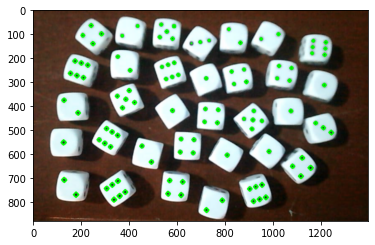

In [10]:
contours = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
count = 0
for contour in contours:
    rect = cv2.minAreaRect(contour)
    area = rect[1][0] * rect[1][1]
    if area > 400:
        continue
    count += 1
    points = cv2.boxPoints(rect)
    box = np.int0(points)
    cv2.drawContours(another,[box],0,(0,255,0),5)

plt.imshow(another)
print(count)